**NIRAJ PATHARKAR**

**The Sparks Foundation**

Prediction using Decision Tree Algorithm

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading dataset
df = pd.read_csv('Iris.csv')
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])
print('Features:',df.columns)

Rows: 150
Columns: 6
Features: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [20]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Cheacking for null values
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [5]:
# Datatypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Cheacking Target values
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
# Copy dataframe
df1 = df.copy()

In [8]:
# Converting Categorical values
mapping = {'Iris-versicolor':0,
           'Iris-virginica':1,
           'Iris-setosa':2
          }
df1['Species'] = df1.Species.map(mapping) 
df1.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [9]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2


In [10]:
df1['Species'].nunique()

3

In [11]:
# Dependent asnd Independent values
X = df1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df1['Species']

In [12]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Species, dtype: int64

In [13]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [14]:
print('Training Shape:',X_train.shape)
print('Testing Shape:',X_test.shape)

Training Shape: (120, 4)
Testing Shape: (30, 4)


In [15]:
# Traing model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
# predicting values
y_pred = dt.predict(X_test)
y_pred

array([1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 1,
       0, 2, 2, 2, 2, 2, 2, 1])

In [17]:
# Predicted and actual values
result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result.head()

,Actual,Predicted
128,1,1
18,2,2
130,1,1
105,1,1
107,1,1


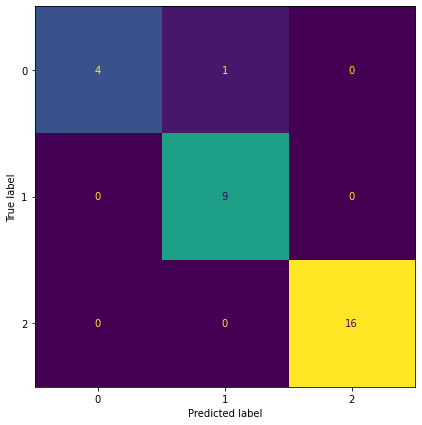

In [47]:
# plotting Confusion Matrix
plt.rcParams["figure.figsize"] = (15,7)
from sklearn.metrics import *
cm = confusion_matrix(y_test,y_pred,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot(colorbar=False)

In [19]:
# Accuracy of model
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.9666666666666667


[Text(697.5, 978.48, 'PetalLengthCm <= 2.45\ngini = 0.662\nsamples = 120\nvalue = [45, 41, 34]\nclass = Iris-setosa'),
 Text(590.1923076923077, 761.0400000000001, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = Iris-virginica'),
 Text(804.8076923076923, 761.0400000000001, 'PetalWidthCm <= 1.75\ngini = 0.499\nsamples = 86\nvalue = [45, 41, 0]\nclass = Iris-setosa'),
 Text(429.2307692307692, 543.6, 'PetalLengthCm <= 4.95\ngini = 0.153\nsamples = 48\nvalue = [44, 4, 0]\nclass = Iris-setosa'),
 Text(214.6153846153846, 326.1600000000001, 'PetalWidthCm <= 1.65\ngini = 0.044\nsamples = 44\nvalue = [43, 1, 0]\nclass = Iris-setosa'),
 Text(107.3076923076923, 108.72000000000003, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = Iris-setosa'),
 Text(321.9230769230769, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(643.8461538461538, 326.1600000000001, 'PetalWidthCm <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]\nclass = Iris-ve

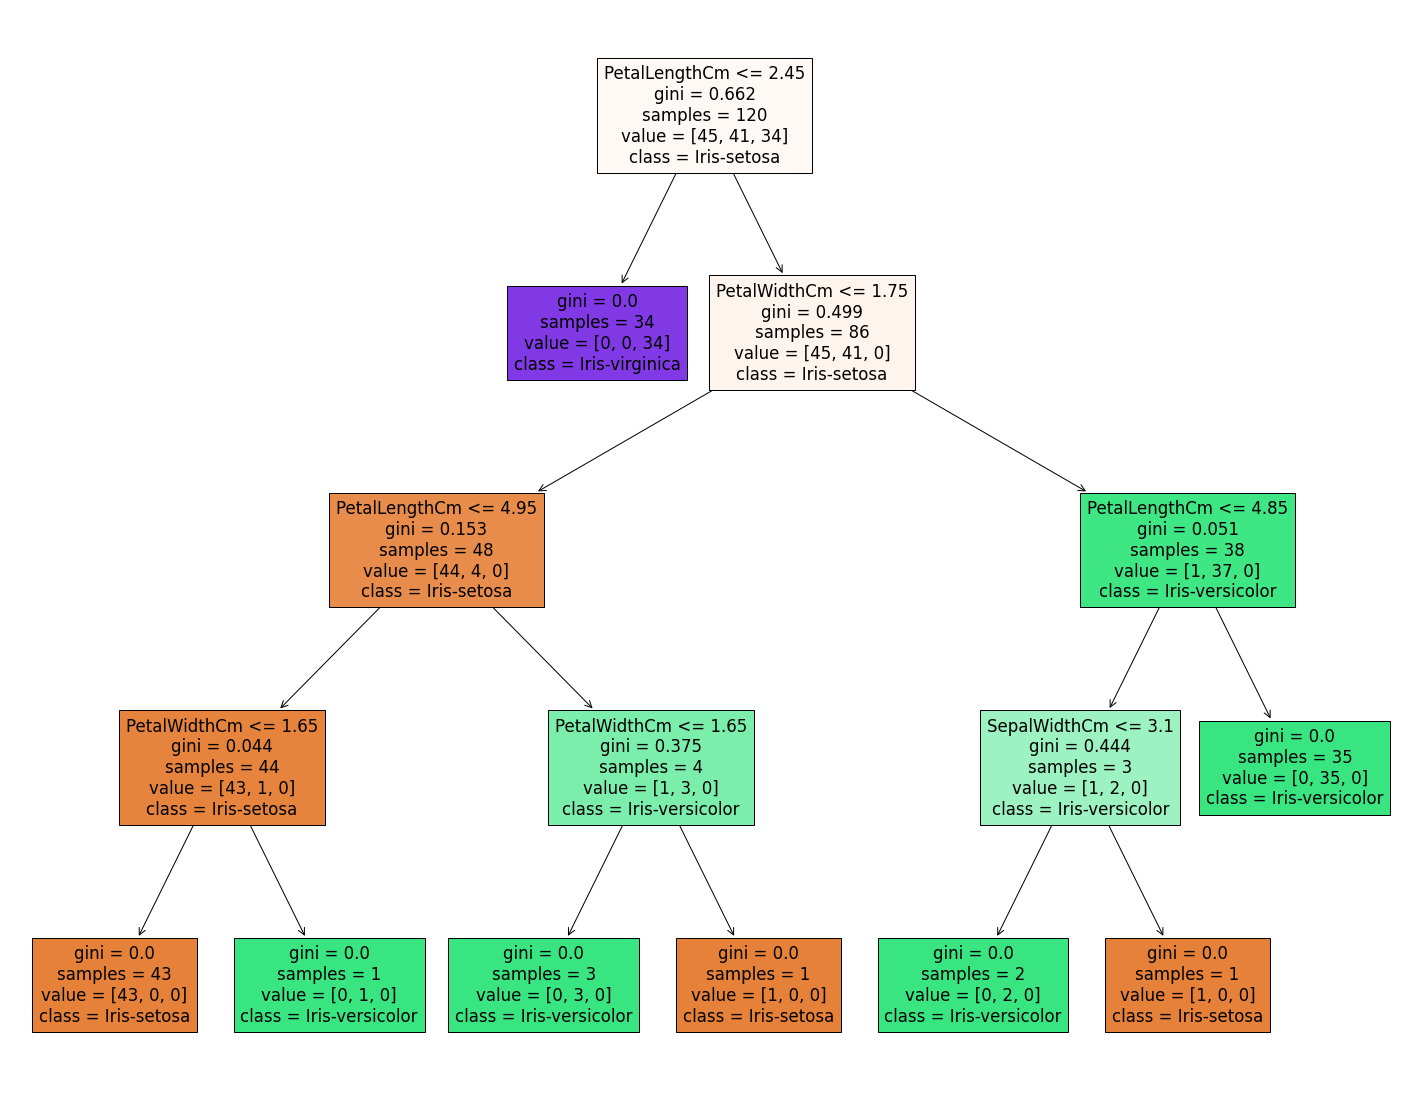

In [53]:
# Visualizing Decision Tree Classifier
plt.figure(figsize=(25,20))
from sklearn import tree
tree.plot_tree(dt,feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],\
               class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],filled=True)